## Final Project Submission

Please fill out:
* Student name: Farnaz Golnam
* Student pace: Full time
* Scheduled project review date/time: Feb 24th, 12pm PST
* Instructor name: Rafael Cassaro
* Blog post URL: To be updated


# Modeling Process:
1. importing libraries and available data set
2. make dataset ready for the linear regression modeling.
3. create the model
4. interpreting the results
5. answering questions

# 1.Importing libraries and available data set:

In [5]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#STATSMODELS
#statistical analysis & regression
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
import scipy.stats as stats

#SCIKIT LEARN
#metrics
#from sklearn.metrics import mean_squared_error
#linear regression
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#label encoding
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

#create dummy variables
#from sklearn.preprocessing import LabelBinarizer
#lb_bin = LabelBinarizer()

#recursive feature elimination
#from sklearn.feature_selection import RFE
#from sklearn.feature_selection import RFECV

#train test split
#from sklearn.model_selection import train_test_split

#k-fold cross validation
#from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

In [6]:
with open('df_clean.pickle','rb') as f:
    df_clean = pickle.load(f)

In [7]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,2170,400.0,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,770,0.0,1933.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987.0,47.6168,-122.045,1800,7503
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,1060,0.0,1963.0,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,8,1180,130.0,2008.0,47.5773,-122.409,1330,1265
21592,360000.0,3,2.5,1530,1131,3.0,0.0,0.0,8,1530,0.0,2009.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,8,2310,0.0,2014.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.5,1020,1350,2.0,0.0,0.0,7,1020,0.0,2009.0,47.5944,-122.299,1020,2007


# 2.Making dataset ready for the linear regression:
we have to deliver the requirements of linear reqression:

## Linear Regression Assumptions:

### a. Multicolliniearity of features : we will check that through heatmaps
Because the idea behind regression is that you can change one variable and keep the others constant, correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well. So we will remove predictors that are highly correlated with others.

### b. distributions of the predictors: we will check thet through histograms
when we have non-normal distributions in our data set, one common option for transforming non-normal variable distributions is to try applying a logarithmic function(Log Transformations).

### c. Categorical variables: we will check that through histograms:
When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:

Perform label encoding

Create dummy variables / one-hot-encoding

# 2a) check for multicollinearity of features:

First we need to check for relationships between variables. One easy way to start this process is by graphing a correlation heatmap that will visually display how correlated every variable is to each others. 

(16.0, 0.0)

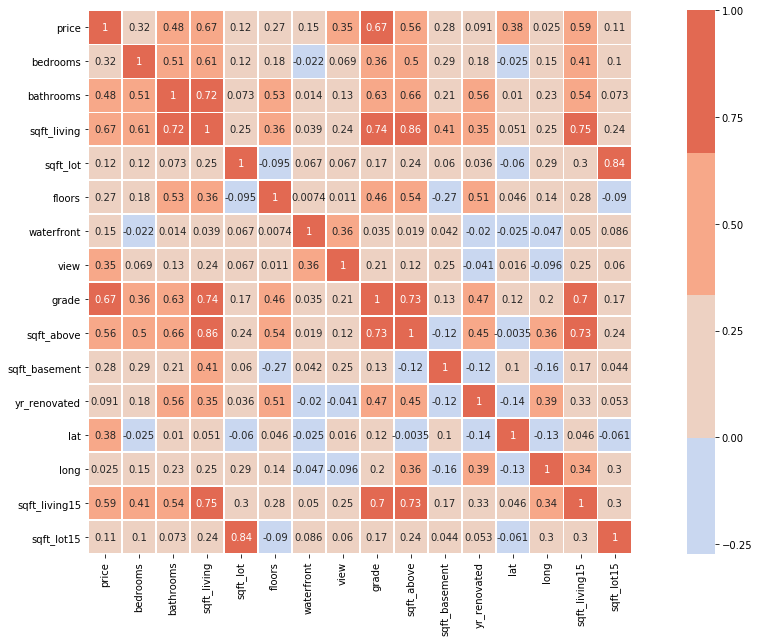

In [8]:
#Heatmap of all correlation coefficients
plt.figure(figsize=(20,10))
ax= sns.heatmap(df_clean.corr(), annot=True, cmap=sns.color_palette('coolwarm'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
df_clean.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.668374
sqft_living      0.665514
sqft_living15    0.587540
sqft_above       0.563780
bathrooms        0.477295
lat              0.379673
view             0.350012
bedrooms         0.318814
sqft_basement    0.284592
floors           0.273651
waterfront       0.154395
sqft_lot         0.119918
sqft_lot15       0.112274
yr_renovated     0.090887
long             0.024731
Name: price, dtype: float64

# Observation:
### 1. features that have the most effect on the price are by order:
>"grade" , "sqft_living" , sqft_living15" , "sqft_above" , "bathrooms" , "lat" , "view" , "bedrooms" , "sqft_basement" , "floors"
### 2. among these feature some have high correlation with each other, Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. we decide to drop any feature >= 0.75.

>sqft_above & sqft_living : 0.86

>sqft_above & sqft_living15 : 0.73

>sqft_above & grade : 0.73

#### we will drop sqft_above(square footage of house apart from basement) which is mostly simillar to sqft_living(square footage of the home), also we are going to consider the affect of sqft_basement on the price as well and we dont miss informative data.


>sqft_living & sqft_living15: 0.75

>sqft_living & grade : 0.74

>sqft_living & bathrooms : 0.72

>sqft_living15 & grade : 0.7

#### the sqft_living15 has less affect on price than sqft_living, so we will drop sqft_living15 and will keep the other one.


>sqft_lot & sqft_lot15 : 0.84

#### we will drop sqft_lot15 as it has less affect on price.

In [92]:
#df_clean1=df_clean.copy(deep=True)
df_clean=df_clean.drop(["sqft_above","sqft_living15","sqft_lot15"], axis=1, inplace=False)
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_renovated,lat,long
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,400.0,1991.0,47.7210,-122.319
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,0.0,1933.0,47.7379,-122.233
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,910.0,1965.0,47.5208,-122.393
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,0.0,1987.0,47.6168,-122.045
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,0.0,1963.0,47.4095,-122.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,8,130.0,2008.0,47.5773,-122.409
21592,360000.0,3,2.5,1530,1131,3.0,0.0,0.0,8,0.0,2009.0,47.6993,-122.346
21593,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,8,0.0,2014.0,47.5107,-122.362
21594,402101.0,2,0.5,1020,1350,2.0,0.0,0.0,7,0.0,2009.0,47.5944,-122.299


### double check the output after dropping the collinear features:

(13.0, 0.0)

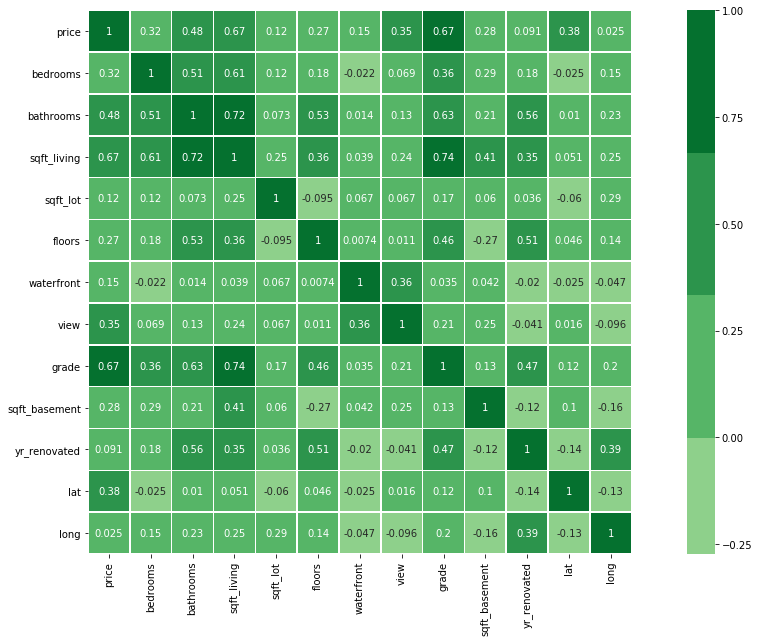

In [93]:
#heatmap
plt.figure(figsize=(20,10))
ax= sns.heatmap(df_clean.corr(), annot=True, cmap=sns.color_palette('Greens'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [94]:
df_clean.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.668374
sqft_living      0.665514
bathrooms        0.477295
lat              0.379673
view             0.350012
bedrooms         0.318814
sqft_basement    0.284592
floors           0.273651
waterfront       0.154395
sqft_lot         0.119918
yr_renovated     0.090887
long             0.024731
Name: price, dtype: float64

### PERFECT ! 
#### everything sounds reliable for now. we can also drop columns of yr_renovated and long as they have almost no effect on the price.

# 2b) checking the distribution of numerical predictors:

after all changes we have made to the data set, we are going to check the distribution of our Numerical features again to make sure they are normaly distributed and will create a linear regression.

In [55]:
df_clean.columns=["price","sqft_living","sqft_lot","sqft_basement","yr_renovated","lat","long","bedrooms","bathrooms","floors","waterfront","view","grade"]
#df_clean

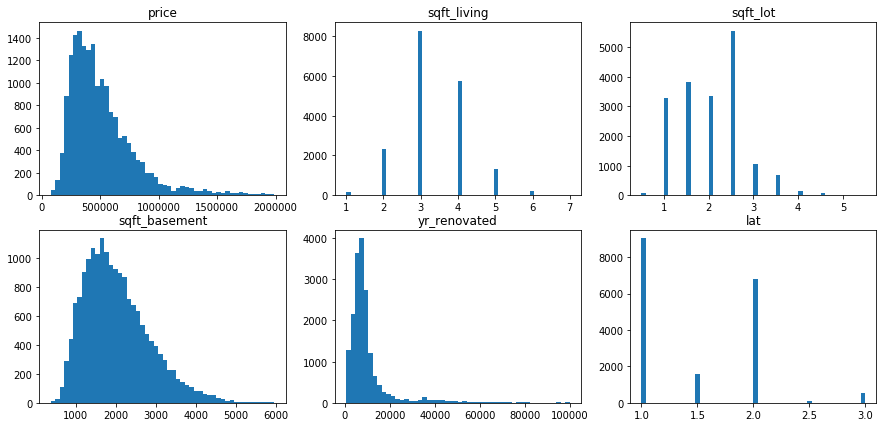

In [140]:
fig, axs = plt.subplots(2, 3, figsize=(15,7))

for index, ax in enumerate(axs.flatten()):
   
    if index<7:
        column = df_clean1.columns[index]
        ax.hist(df_clean1[column], bins=50) 
        ax.set_title(column)
    
plt.show()

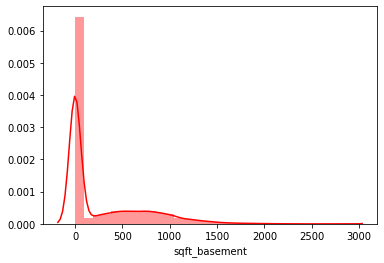

In [178]:
#another style of histogram for a closer look:
sns.distplot(df_clean["sqft_basement"], bins=30, kde=True, rug=False, color="red")

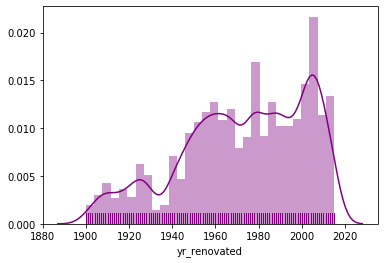

In [188]:
sns.distplot(df_clean["yr_renovated"], bins=30, kde=True, rug=True, color="purple")

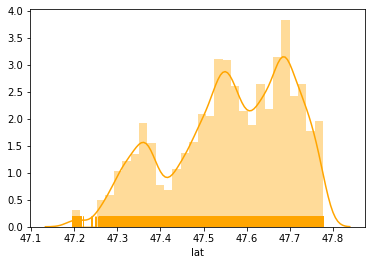

In [190]:
sns.distplot(df_clean["lat"], bins=30, kde=True, rug=True, color="orange")

### among these numerical features, "sqft_basement", "yr_renovated", "lat" are the most non-normally distributed. 
1. based on our heatmaps, "yr_renovated" does not have a significant effect on the housing price, so this feature can be dropped.


2. "lat" effects the housing price, so we have to find a way to normalize its distribution as much as we can and keep it.


3. "sqft_basement" is heavily skeweed. after we do all we can to normalize its distribution and keep it as an effective feature on price, we can still change it to a categorical feature and deal with that.

### To normalize the distribustions of numerical features, we are going to work on:

### 2ba) Log-transformations. 

### 2bb) Feature scaling/data normalization:

1. mean-normalization method

2. min-max scalling method


# 2ba) Log-transformations

In [196]:
# creating a new DataFrame for log-transformations
df_clean_log = pd.DataFrame([])

# log-transforming for numerical features
subset=['price','sqft_living','sqft_lot','yr_renovated','lat']

for column in df_clean[subset]:
    df_clean_log[column] = np.log(df_clean[column])

#df_clean_log["sqft_basement"] = np.log(df_clean["sqft_basement"])

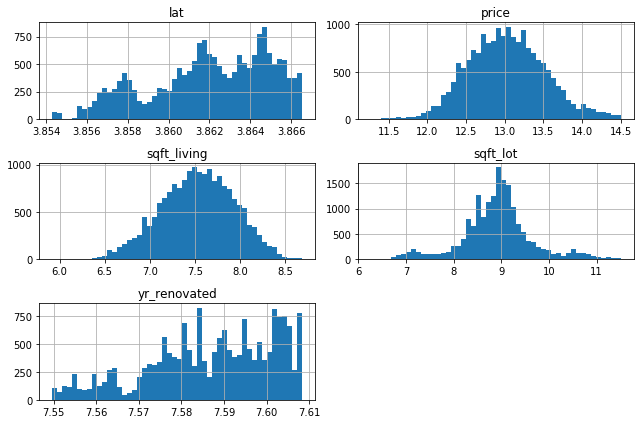

In [197]:
fig = df_clean_log[subset].hist(bins=50, figsize=(9,6), grid=True)
plt.tight_layout();
#df_clean_log[subset].plot.hist(figsize  = [10, 6]);

In [198]:
df_clean_log["sqft_basement"] = np.log(df_clean["sqft_basement"])

In [200]:
#sns.distplot(df_clean_log["sqft_basement"], bins=30, kde=True, rug=True, color="orange")

log transfer is not working on "sqft_basement".

"sqft_living" and "sqft_lot" became more normalized but other 3 numerical features "yr_renovated" , "lot" still need more work to become more normally distributed.

# 2bb)  mean normalization/min-max scaling 

In [201]:
#mean normalization for the same features after log-transformation:
df_clean_log_scaled = pd.DataFrame([])
for column in df_clean_log.columns:
    G = df_clean_log[column]
    df_clean_log_scaled[column] = (G-np.mean(G)) / (max(G)-min(G))

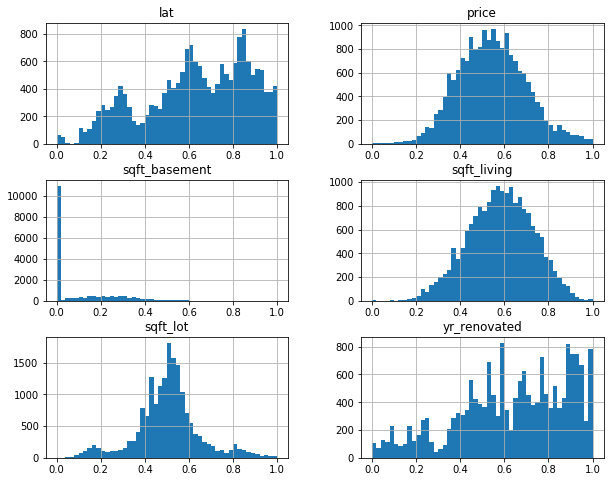

In [234]:
# display the histograms to check the results
df_clean_log_scaled.hist(bins=50, figsize  = [10, 8]);

"yr_renovated" , "lat" still are not as good as they need to be, lets try min-max scalling instead:

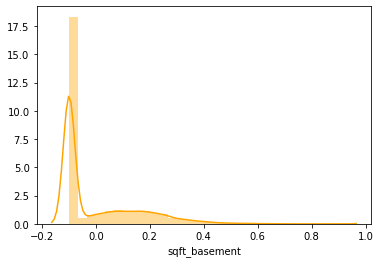

In [225]:
#mean normalization on the 'sqft_basement' features without log-transformation:
G = df_clean['sqft_basement']
df_clean_log_scaled["sqft_basement"] = (G-np.mean(G)) / (max(G)-min(G))
sns.distplot(df_clean_log_scaled["sqft_basement"], bins=30, kde=True, rug=False, color="orange")

In [230]:
## min-max scaling for all the numerical features after log transformation:
df_clean_log_scaled = pd.DataFrame([])
for column in df_clean_log.columns:
    G = df_clean_log[column]
    df_clean_log_scaled[column] = (G-min(G)) / (max(G)-min(G))

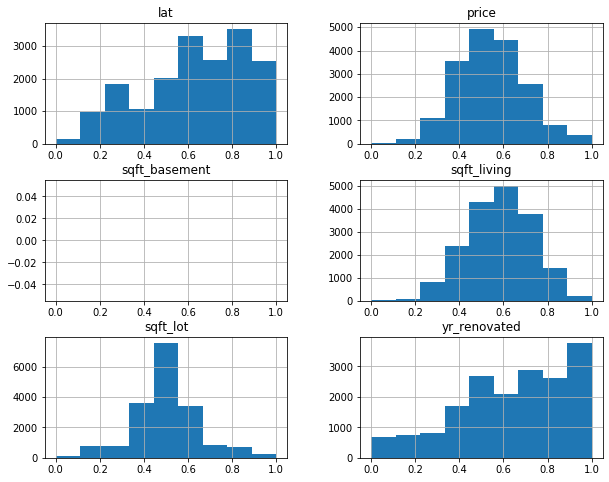

In [231]:
# display the histograms to double check results
df_clean_log_scaled.hist(bins=9, figsize  = [10, 8]);

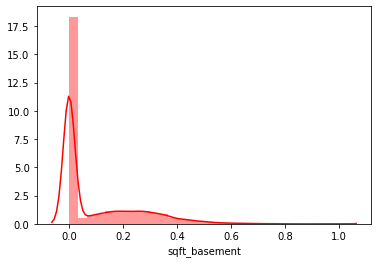

In [233]:
#min/max normalization on the 'sqft_basement' features without log-transformation:
G = df_clean['sqft_basement']
df_clean_log_scaled['sqft_basement'] = (G-min(G))/(max(G)-min(G))
#df_clean_log_scaled['sqft_basement'].hist(bins=9, figsize  = [5, 4]);
sns.distplot(df_clean_log_scaled["sqft_basement"], bins=30, kde=True, rug=False, color="red")

As we can see, the min/max scalling has a better effect on the numerical features.

the features with the max/min normalization have been distributed between 0 and 1. 

the feautures with mean normalization have been distributed between -0.5 and -0.5.

### Observations:
we are going to: 

1. drop "yr_renovated" 

2. change "sqft_basement" to a categorical feature

3. for the rest of the numerical features, to get a mor eaccurate normal distribution for linear regression modeling, we will do both log transformation and min/max scaling.

In [ ]:
#drop yr_renovation

In [ ]:
#change "sqft_basement" to a categorical feature

# 2c) label coding categorical variables

In [ ]:
#scatter matrix
#pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
#plt.show()

#heatmap
#import seaborn as sns
#sns.heatmap(data_pred.corr(), center=0);

In [ ]:
#Label encoding

#origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
#origin_series = pd.Series(origin)

#cat_origin = origin_series.astype('category')
#cat_origin

#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

#origin_encoded = lb_make.fit_transform(cat_origin)
#origin_encoded